<hr style="height:4px;border-width:0;color:white;background-color:green">
<h2 style="color: orange">Bird Identification using iNaturalist Training Dataset</h2>
<hr style="height:4px;border-width:0;color:white;background-color:green">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

<hr style="height:4px;border-width:0;color:white;background-color:green">
<h2 style="color: orange">Image processing</h2>
<hr style="height:4px;border-width:0;color:white;background-color:green">

In [2]:
IMAGE_RES = 224  
def preprocess_image_to_tensor(img_path, ax):
    img = load_img(img_path, target_size=(IMAGE_RES, IMAGE_RES)) 
    ax.imshow(img, alpha=1)
    out = img_to_array(img)/255.0
    out = np.expand_dims(out, axis=0)
    return out

<hr style="height:4px;border-width:0;color:white;background-color:green">
<h2 style="color: orange">Load pretrained module by iNaturalist</h2>
<hr style="height:4px;border-width:0;color:white;background-color:green">

In [3]:
URL = 'https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1' # this is subset, 2017, https://github.com/visipedia/inat_comp/tree/master/2017
bird = hub.KerasLayer(URL, input_shape=(IMAGE_RES,IMAGE_RES,3))  
bird.trainable=False
model=tf.keras.Sequential([bird])
# model.summary()# freeze model weights

<hr style="height:4px;border-width:0;color:white;background-color:green">
<h2 style="color: orange">Classify</h2>
<hr style="height:4px;border-width:0;color:white;background-color:green">

1/1 [==============================] - 0s 29ms/step


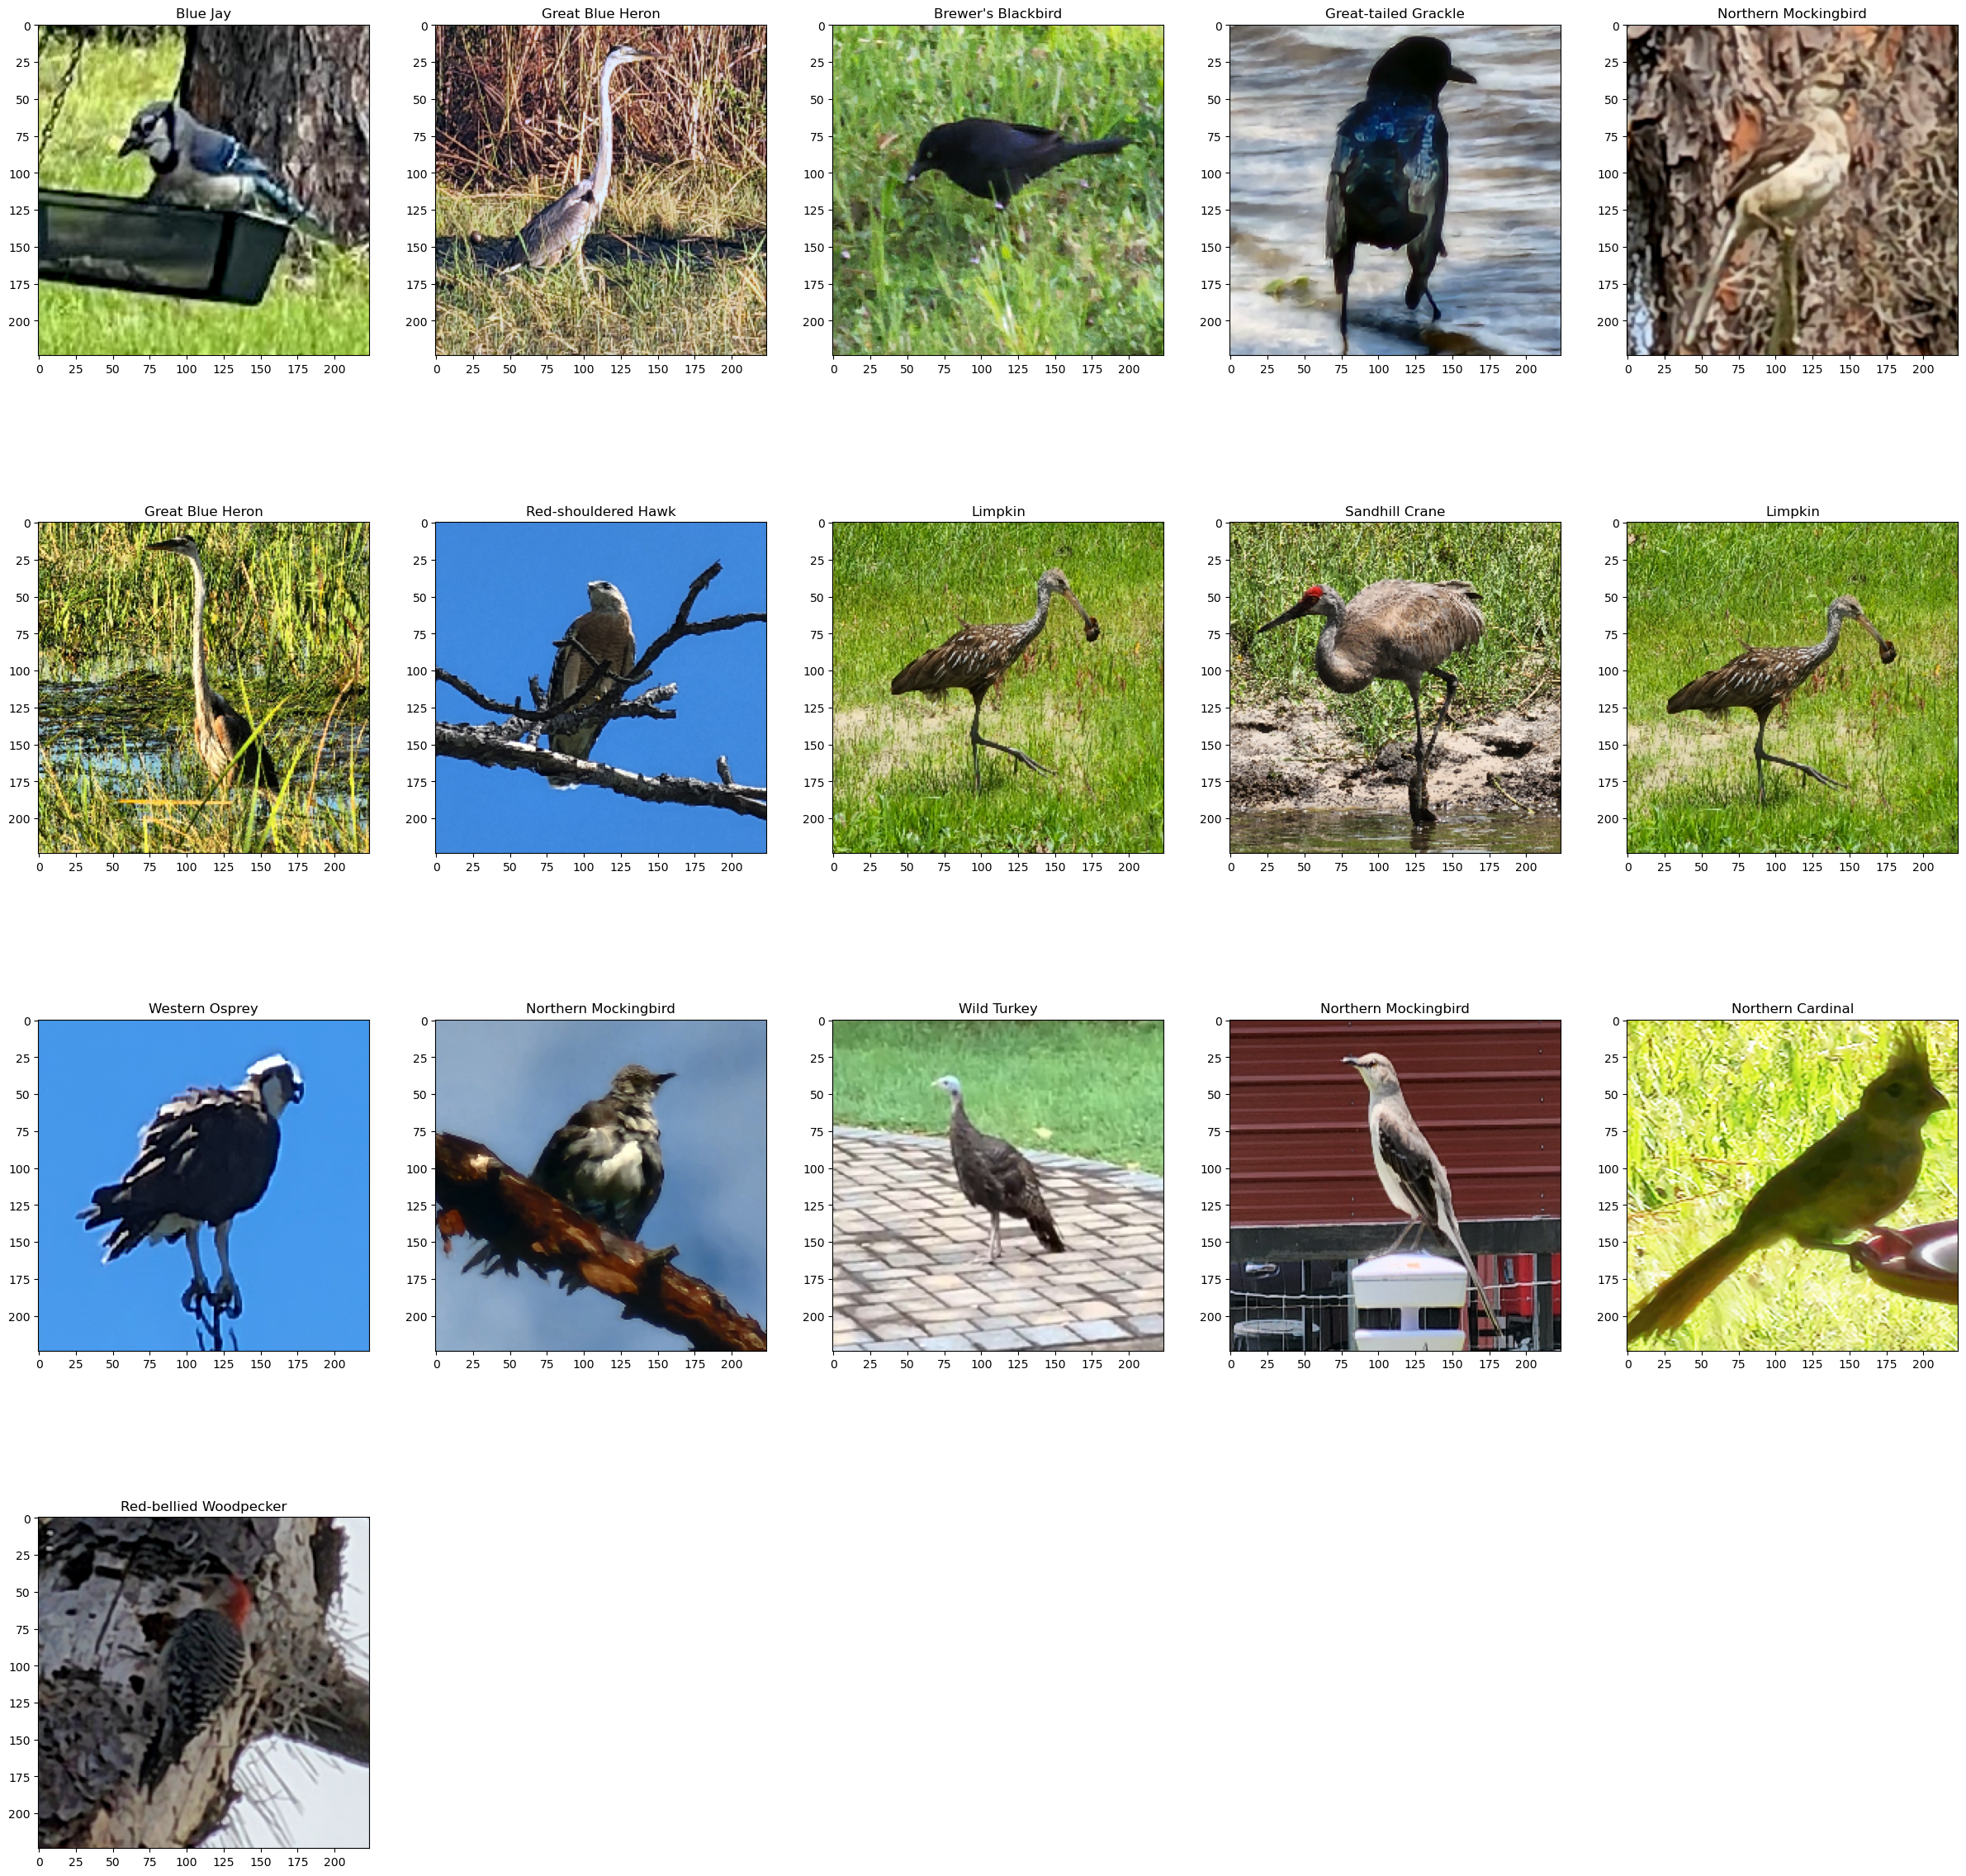

In [4]:
labels = pd.read_csv("labels_oiseaux.csv", sep=',', header=0, index_col=0) 
my_files = np.array(glob("images/*")) 
num_img=my_files.shape[0]
lines = num_img//5 + 1
columns = np.minimum(5,num_img)
plt.figure(figsize=(30,30))
label='name'
for index, file in enumerate(my_files):
  ax=plt.subplot(lines, columns,index+1)
  processed_image=preprocess_image_to_tensor(file, ax) 
  output = model.predict(processed_image) 
  prediction = np.argmax(tf.squeeze(output).numpy())
  plt.title(labels[label][prediction])
plt.show()